In [1]:
#importing the necessary liberaries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
from functions import *

In [14]:
#readin the data sheet
data = pd.read_excel('data.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Years       33 non-null     int64  
 1   Salary      30 non-null     float64
 2   material 1  33 non-null     float64
 3   material 2  33 non-null     float64
 4   demand      33 non-null     int64  
 5   price       33 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.7 KB


In [15]:
#dealing with NaN values
data = data.interpolate(method='linear')
data

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.0,200.000000,89.600000,103,1200.0
1,1991,46205.0,212.000000,92.662500,104,1375.0
2,1992,37731.0,224.720000,95.807250,101,1451.0
3,1993,43525.0,238.203200,99.034819,99,1593.0
4,1994,39891.0,252.495392,102.345626,95,1718.5
5,1995,56642.0,267.645116,105.739927,96,1844.0
6,1996,60150.0,283.703822,109.217795,95,1969.5
7,1997,54445.0,300.726052,112.779099,92,2095.0
8,1998,64445.0,318.769615,116.423489,92,2220.5
9,1999,57189.0,337.895792,120.150370,87,2346.0


In [16]:
#doing the Linear Regression and predicting the future salaries
X = data['Years'].values.reshape(-1,1)
Y = data['Salary'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [17]:
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]

score = model.score(X,Y)
score

0.9312739842698768

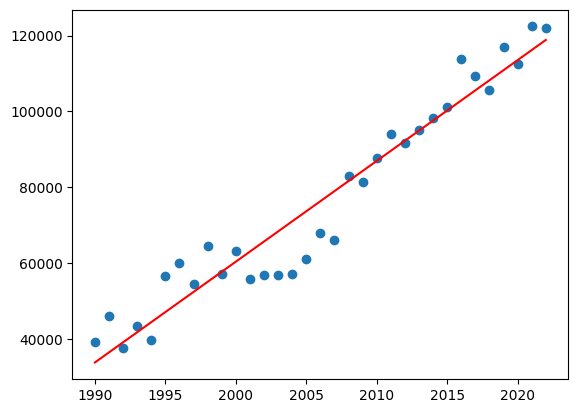

In [19]:
plt.scatter(data['Years'], data['Salary'])
plt.plot(data['Years'], model.predict(X), c='red')
plt.show()

In [21]:
#defining the predict function
def predict(x):
    return intercept + coefficient * x

In [22]:
predicted_data = pd.DataFrame({'Years': [i for i in range(2023,2051)],
                               'Salary': [predict(i) for i in range(2023,2051)]})
predicted_data

,Years,Salary
0,2023,121492.440341
1,2024,124147.492981
2,2025,126802.545622
3,2026,129457.598262
4,2027,132112.650902
5,2028,134767.703543
6,2029,137422.756183
7,2030,140077.808824
8,2031,142732.861464
9,2032,145387.914104


In [23]:
d = pd.concat([data,predicted_data], ignore_index=True)
d = d.sort_values('Years', ignore_index=True)
d

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.000000,200.000000,89.600000,103.0,1200.0
1,1991,46205.000000,212.000000,92.662500,104.0,1375.0
2,1992,37731.000000,224.720000,95.807250,101.0,1451.0
3,1993,43525.000000,238.203200,99.034819,99.0,1593.0
4,1994,39891.000000,252.495392,102.345626,95.0,1718.5
...,...,...,...,...,...,...
56,2046,182558.651070,NaN,NaN,NaN,NaN
57,2047,185213.703710,NaN,NaN,NaN,NaN
58,2048,187868.756350,NaN,NaN,NaN,NaN
59,2049,190523.808991,NaN,NaN,NaN,NaN
